# The Pi-Mu-e Experiment: Dan & Robert

# Introduction / Abstract


# Procedure


# Data



In [3]:
from astropy.io import ascii
data = ascii.read('data.csv')
data

page,length,radius
float64,float64,float64
5771.0,0.65,9.0
5771.0,0.75,15.0
5771.0,0.55,16.0
5917.0,1.3,16.0
5917.0,1.2,17.0
5917.0,1.3,18.0
5780.0,1.0,14.0
5780.0,0.75,15.0
5780.0,0.5,11.0


# Analysis / Calculations


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.optimize import curve_fit
from matplotlib import pyplot
%matplotlib inline

In [41]:
R = 13.9 # np.average(data['radius']/.785) = 11.2345
L = np.average(data['length']/.785)
print(R)
print(L)

c = 1 #2.998 * 10**8 m/s
rho = 0.07 # kg/m^3
e = 3 * 10**-4 
B = 8800 # Gauss
m = (3*R*B*e)/c #kg
T = np.sqrt(2.1*m*(c**2)*rho*L)
P = np.sqrt((T**2) + (2*T*m*(c**2)))/c

mp = (np.sqrt(((P*c)**2) + (m*(c**2))**2) + (P*c)) / (c**2)
print(mp)

13.9
1.29839316734
146.769664374


C:\Users\Dan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  


In [42]:
data2 = ascii.read('exp_data.csv')
data2

delta_t,timestamp
int32,int32
5320,1506433771
12240,1506433773
3980,1506433788
16940,1506433809
15740,1506433813
18940,1506433814
19220,1506433816
3320,1506433817
17520,1506433818


(array([ 19638.,  11045.,   8623.,   7865.,   7458.,   7378.,   7215.,
          7231.,   7376.,   7351.]),
 array([    40.,   2034.,   4028.,   6022.,   8016.,  10010.,  12004.,
         13998.,  15992.,  17986.,  19980.]),
 <a list of 10 Patch objects>)

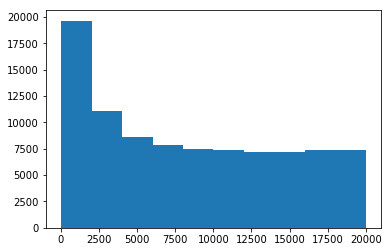

In [46]:
x = data2['delta_t']
plt.hist(x)

In [47]:
def func(x, a, b):

return a*x + b

popt, pcov = curve_fit(func, r, l)


plt.plot(x, y, '-')
plt.text(0.5*10**-8, 30, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
plt.text(0.5*10**-8, 20, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
plt.grid()
plt.title('Change in Time vs Change in Distance Travelled')
plt.plot(r, l, 'rs')
plt.xlabel('Change in Distance (m)')
plt.ylabel('Change in Time (ns)')
plt.show()

NameError: name 'y' is not defined

# Conclusion